In [ ]:
#教程一：基于同一颜色在既有的相机图形中绘制2d侦测框，由于zip(types,boxes)处有点问题，因此基于不同类型车绘制不同颜色未实现

In [5]:
import numpy as np
import pandas as pd
COLUMN_NAMES = ['frame', 'track_id', 'type', 'truncated', 'occluded', 'alpha', 'bbox_left', 'bbox_top',
                         'bbox_right', 'bbox_bottom', 'height', 'width', 'length', 'pos_x', 'pos_y', 'pos_z', 'rot_y']
df=pd.read_csv('/home/lc/RosKitti/kitti/training/label_02/0000.txt',header=None,sep=' ')
df.columns=COLUMN_NAMES
df.head()
df

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,height,width,length,pos_x,pos_y,pos_z,rot_y
0,0,-1,DontCare,-1,-1,-10.000000,219.310000,188.490000,245.500000,218.560000,-1000.000000,-1000.000000,-1000.000000,-10.000000,-1.000000,-1.000000,-1.000000
1,0,-1,DontCare,-1,-1,-10.000000,47.560000,195.280000,115.480000,221.480000,-1000.000000,-1000.000000,-1000.000000,-10.000000,-1.000000,-1.000000,-1.000000
2,0,0,Van,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,153,10,Car,0,2,-1.818856,680.294919,177.511028,842.313244,284.070033,1.524000,1.728591,3.894227,2.353367,1.622590,12.436503,-1.637280
1085,153,11,Car,0,2,1.864481,245.920800,194.456182,394.817829,286.444967,1.444000,1.595116,3.791789,-5.458963,1.908188,13.979427,1.497916
1086,153,12,Pedestrian,1,0,0.826456,1185.199080,151.165841,1241.000000,348.552707,1.688000,0.800000,0.884000,5.739732,1.500532,6.279632,1.543272
1087,153,13,Car,0,0,1.773993,344.361560,188.772369,430.531955,248.482384,1.422414,1.512803,3.707634,-6.033258,1.888008,19.788795,1.481180


In [22]:
dt_tracking_frame=df[df.frame==0]
dt_tracking_frame
track_ids=np.array(dt_tracking_frame['track_id'])
track_ids[2]

2

In [6]:
# df = df[df.type.isin(['Car', 'Pedestrian', 'Cyclist'])]
# df
#df.type.isin(['Pedestrian','Van','Cyclist'])
# df.loc[df.type.isin(['Bus', 'Truck', 'Van', 'Tram']),'type']='Car'
# df = df[df.type.isin(['Car', 'Pedestrian', 'Cyclist'])]
# df
df.loc[df.type.isin(['Bus', 'Truck', 'Van', 'Tram']),'type']='Car'
df=df[df.type.isin(['Car','Pedestrian','Cyclist'])]
df


,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,height,width,length,pos_x,pos_y,pos_z,rot_y
2,0,0,Car,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245
7,1,0,Car,0,0,-1.796862,294.898777,156.024256,452.199718,284.621269,2.000000,1.823255,4.433886,-4.650955,1.766774,13.581085,-2.121565
8,1,1,Cyclist,0,0,-1.935205,745.017137,156.393157,938.839722,374.000000,1.739063,0.824591,1.785241,1.700640,1.640419,5.778596,-1.664456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,153,10,Car,0,2,-1.818856,680.294919,177.511028,842.313244,284.070033,1.524000,1.728591,3.894227,2.353367,1.622590,12.436503,-1.637280
1085,153,11,Car,0,2,1.864481,245.920800,194.456182,394.817829,286.444967,1.444000,1.595116,3.791789,-5.458963,1.908188,13.979427,1.497916
1086,153,12,Pedestrian,1,0,0.826456,1185.199080,151.165841,1241.000000,348.552707,1.688000,0.800000,0.884000,5.739732,1.500532,6.279632,1.543272
1087,153,13,Car,0,0,1.773993,344.361560,188.772369,430.531955,248.482384,1.422414,1.512803,3.707634,-6.033258,1.888008,19.788795,1.481180


In [7]:
box=np.array(df.loc[2,['bbox_left','bbox_top','bbox_right','bbox_bottom']])
box
# df.loc[2,['bbox_left','bbox_top','bbox_right','bbox_bottom']]

array([296.744956, 161.752147, 455.226042, 292.37280400000003],
      dtype=object)

In [3]:
DETECTION_COLOR_DICT={'Car':(255,255,0) , 'Cyclist':(141,40,255), 'Pedestrian':(0,226,255)}
DETECTION_COLOR_DICT['Car']

(255, 255, 0)

In [7]:
#针对第一帧图片
# import cv2
# image=cv2.imread('/home/lc/RosKitti/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/image_02/data/0000000000.png')
# boxes=np.array(df[df['frame']==0][['bbox_left','bbox_top','bbox_right','bbox_bottom']])
# types=np.array(df[df.frame==0]['type'])
#针对第10帧图片
import cv2
frame=120
image=cv2.imread('/home/lc/RosKitti/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/image_02/data/%010d.png'%frame)
boxes=np.array(df[df['frame']==frame][['bbox_left','bbox_top','bbox_right','bbox_bottom']])
types=np.array(df[df.frame==frame]['type'])

# 方法1：同一颜色画出不同类型的框框
for box in boxes:
    top_left=int(box[0]),int(box[1])
    bottom_right=int(box[2]),int(box[3])
    cv2.rectangle(image,top_left,bottom_right,(255,255,0),2)
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()
# 方法2：不同颜色画出不同类型的框框
# for typ,box in zip(types,boxes):
#     top_left=int(box[0]),int(box[1])
#     bottom_right=int(box[2]),int(box[3])
#     cv2.rectangle(image,top_left,bottom_right,DETECTION_COLOR_DICT[typ],2)
# cv2.imshow('image',image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
# df[df.frame==0]
np.array(df[df['frame']==0][['bbox_left','bbox_top','bbox_right','bbox_bottom']])

In [ ]:
boxes=np.array(df[df['frame']==0][['bbox_left','bbox_top','bbox_right','bbox_bottom']])
types=np.array(df[df.frame==0]['type'])

In [18]:
boxes


array([[ 296.744956,  161.752147,  455.226042,  292.372804],
       [ 737.619499,  161.531951,  931.112229,  374.      ],
       [1106.137292,  166.576807, 1204.470628,  323.876144]])

In [19]:
types

array(['Car', 'Cyclist', 'Pedestrian'], dtype=object)

In [6]:
zip(types,boxes)[0]


TypeError: 'zip' object is not subscriptable

In [27]:
zip(types,boxes)

In [3]:
import numpy as np
import pandas as pd

IMU_COLUMN_NAMES = ['lat', 'lon', 'alt', 'roll', 'pitch', 'yaw', 'vn', 've', 'vf', 'vl', 'vu', 'ax', 'ay', 'az', 'af',
                    'al', 'au', 'wx', 'wy', 'wz', 'wf', 'wl', 'wu', 'posacc', 'velacc', 'navstat', 'numsats', 'posmode',
                    'velmode', 'orimode']

def read_imu(path):
    df = pd.read_csv(path, header=None, sep=' ')
    df.columns = IMU_COLUMN_NAMES
    return df
def compute_great_circle_distance(lat1,lon1,lat2,lon2):
    delta_sigma=float(np.sin(lat1*np.pi/180)*np.sin(lat2*np.pi/180)+\
                     np.cos(lat1*np.pi/180)*np.cos(lat2*np.pi/180)*np.cos(lon1*np.pi/180-lon2*np.pi/180))
    return 6371000.0 * np.arccos(np.clip(delta_sigma,-1,1))
read_imu('/home/lc/RosKitti/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/0000000000.txt')

,lat,lon,alt,roll,pitch,yaw,vn,ve,vf,vl,...,wf,wl,wu,posacc,velacc,navstat,numsats,posmode,velmode,orimode
0,49.011213,8.422885,112.834923,0.022447,0.00001,-1.22191,-3.325632,1.138431,3.514768,0.037625,...,-0.017499,0.021393,0.14563,0.492294,0.068884,4,10,4,4,0


In [37]:
#基于GPS绘制行驶轨迹
# prev_imu_data=None
# gps_distances=[]
# for frame in range(150):
#         imu_data=read_imu('/home/lc/RosKitti/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/%010d.txt'%frame)
        
#         if prev_imu_data is not None:
#             gps_distances+=[compute_great_circle_distance(imu_data.lat,imu_data.lon,prev_imu_data.lat,prev_imu_data.lon)]
        
#         prev_imu_data=imu_data
# gps_distances

prev_imu_data = None
gps_distances = []
imu_distaces=[]
for frame in range(150):
    imu_data = read_imu('/home/lc/RosKitti/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/%010d.txt'%frame)

    if prev_imu_data is not None:
        gps_distances += [compute_great_circle_distance(imu_data.lat, imu_data.lon, prev_imu_data.lat, prev_imu_data.lon)]
        imu_distaces+=[0.1*np.linalg.norm(imu_data[['vf','vl']])]
    prev_imu_data = imu_data
gps_distances
imu_data
  


,lat,lon,alt,roll,pitch,yaw,vn,ve,vf,vl,...,wf,wl,wu,posacc,velacc,navstat,numsats,posmode,velmode,orimode
0,49.010744,8.423286,112.528801,0.030071,0.020883,-1.484225,-6.358428,0.471723,6.375924,0.040397,...,-0.010376,-0.005917,0.10991,0.35195,0.077897,4,6,5,5,0


In [3]:
read_imu('/home/lc/RosKitti/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/0000000001.txt')

,lat,lon,alt,roll,pitch,yaw,vn,ve,vf,vl,...,wf,wl,wu,posacc,velacc,navstat,numsats,posmode,velmode,orimode
0,49.01121,8.422887,112.846901,0.022857,0.004342,-1.206077,-3.288107,1.166745,3.488639,0.054704,...,-0.004166,0.044282,0.139954,0.492294,0.068884,4,10,4,4,0


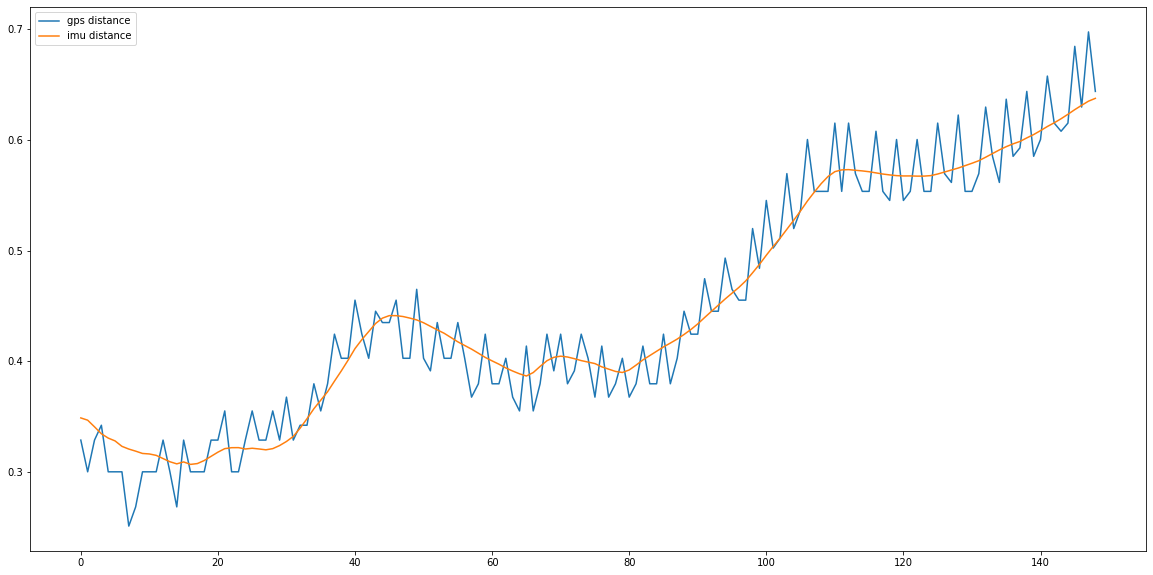

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(gps_distances,label='gps distance')
plt.plot(imu_distaces,label='imu distance')
plt.legend()
plt.show()

In [16]:
prev_imu_data = None
locations = []

for frame in range(150):
    imu_data = read_imu('/home/lc/RosKitti/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/%010d.txt'%frame)

    if prev_imu_data is not None:
        #gps_distances += [compute_great_circle_distance(imu_data.lat, imu_data.lon, prev_imu_data.lat, prev_imu_data.lon)]
        displacement=0.1*np.linalg.norm(imu_data[['vf','vl']])
        yaw_change=float(imu_data.yaw-prev_imu_data.yaw)
        for i in range(len(locations)):
            x0,y0=locations[i]
            x1=x0*np.cos(yaw_change)+y0*np.sin(yaw_change)-displacement
            y1=-x0*np.sin(yaw_change)+y0*np.cos(yaw_change)
            locations[i]=np.array([x1,y1])
    locations+=[np.array([0,0])]
    prev_imu_data = imu_data


In [13]:
locations

[array([[-55.24572559],
        [-24.47145956]]),
 array([[-54.91022885],
        [-24.37565838]]),
 array([[-54.57791154],
        [-24.2762731 ]]),
 array([[-54.25259246],
        [-24.17455335]]),
 array([[-53.93467008],
        [-24.07025329]]),
 array([[-53.62178149],
        [-23.9632472 ]]),
 array([[-53.31267038],
        [-23.85318867]]),
 array([[-53.00965276],
        [-23.7407106 ]]),
 array([[-52.71024957],
        [-23.62560908]]),
 array([[-52.41393101],
        [-23.50778036]]),
 array([[-52.12104176],
        [-23.38704771]]),
 array([[-51.83003203],
        [-23.26301029]]),
 array([[-51.54159505],
        [-23.13623635]]),
 array([[-51.25733272],
        [-23.00707816]]),
 array([[-50.97727257],
        [-22.8758063 ]]),
 array([[-50.70047752],
        [-22.74209154]]),
 array([[-50.42371113],
        [-22.6043504 ]]),
 array([[-50.15043211],
        [-22.46467719]]),
 array([[-49.87804408],
        [-22.32164603]]),
 array([[-49.60491985],
        [-22.17415692]]),


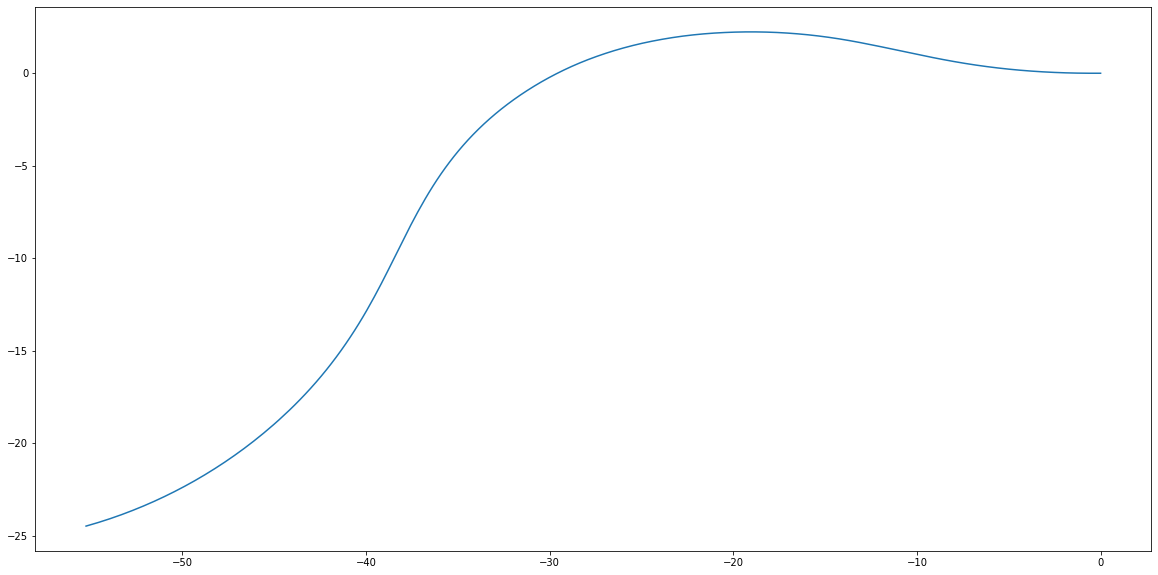

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(np.array(locations)[:,0],np.array(locations)[:,1]) 